In [169]:
import pandas as pd
import numpy as np
import re
import string
import time
from datetime import datetime
from datetime import date
import os

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn import svm

In [170]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
# fileLocation = 'C:\\Users\\yuvar\\Desktop\\Jupyter\\Learning\\Movies - academy-awards\\database.csv'
# saveFileToPath = 'C:\\Users\\yuvar\\Desktop\\Jupyter\\Learning\\Movies - academy-awards\\'

data = pd.read_csv('Awards_database.csv')

In [171]:
data = data.dropna(subset=['Film'])

In [172]:
data = data[data.Award.isin(['Actor','Actor in a Leading Role','Actor in a Supporting Role',
                            'Actress','Actress in a Leading Role','Actress in a Supporting Role',
                            'Directing (Comedy Picture)', 'Directing (Dramatic Picture)',
                            'Assistant Director','Directing'])]

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 9879
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2119 non-null   object 
 1   Ceremony  2119 non-null   int64  
 2   Award     2119 non-null   object 
 3   Winner    433 non-null    float64
 4   Name      2119 non-null   object 
 5   Film      2119 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 115.9+ KB


In [174]:
data.head()

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


In [175]:
# Replace all the numerical values in order to one-hot encode
data.loc[~data.Winner.isna(),'Winner'] = data.Award
data.head()

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,Actor,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,Actress,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


In [176]:
# Create a new dataframe while one hot encoding the Award and Winner
awardsDF = data[['Ceremony','Film','Name']].join(pd.get_dummies(data[['Award','Winner']]))\
                        .groupby('Film')\
                        .max()\
                        .reset_index()
awardsDF.head()
#awardsDF.to_csv('Awards_processed.csv')

,Film,Ceremony,Name,Award_Actor,Award_Actor in a Leading Role,Award_Actor in a Supporting Role,Award_Actress,Award_Actress in a Leading Role,Award_Actress in a Supporting Role,Award_Assistant Director,...,Winner_Actor,Winner_Actor in a Leading Role,Winner_Actor in a Supporting Role,Winner_Actress,Winner_Actress in a Leading Role,Winner_Actress in a Supporting Role,Winner_Assistant Director,Winner_Directing,Winner_Directing (Comedy Picture),Winner_Directing (Dramatic Picture)
0,'Round Midnight,59,Dexter Gordon,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,...And Justice for All,52,Al Pacino,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 Monkeys,68,Brad Pitt,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12 Years a Slave,86,Michael Fassbender,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,127 Hours,83,James Franco,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merge

In [177]:
# movieDBfileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Movies_director_data_3709_119Features.csv'
movieDBfileLocation = 'stage3FinalProcessedDF_May-09-2020.csv'
# movieDBfileLocation = 'Movies_Data_Without_MoneyFeatures.csv'

In [178]:
movie_data = pd.read_csv(movieDBfileLocation)

In [179]:
movie_data.shape

(3708, 123)

In [180]:
movie_data.columns.values

array(['director_ids', 'director_names', 'movie_id', 'title',
       'review_count_user', 'review_count_critic', 'metascore',
       'rating_value', 'rating_count', 'release_date', 'runtime',
       'movie_year', 'opening_weekend_value', 'open_wk_cur_AUD',
       'open_wk_cur_CAD', 'open_wk_cur_DEM', 'open_wk_cur_GBP',
       'open_wk_cur_ITL', 'open_wk_cur_JPY', 'open_wk_cur_SEK',
       'open_wk_cur_SGD', 'open_wk_cur_USD', 'gross_value',
       'gross_cur_USD', 'budget_value', 'budget_cur_AUD',
       'budget_cur_CAD', 'budget_cur_EUR', 'budget_cur_GBP',
       'budget_cur_INR', 'budget_cur_USD', 'color_Black_and_White',
       'color_Color', 'country_Argentina', 'country_Australia',
       'country_Brazil', 'country_Canada', 'country_Denmark',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hong_Kong', 'country_India',
       'country_Italy', 'country_Japan', 'country_Mexico',
       'country_Netherlands', 'country_Other', 'country_R

In [181]:
movie_data['Gender'].value_counts()

Male      3199
Female     509
Name: Gender, dtype: int64

In [182]:
movie_data['Gender'].value_counts()[1] / movie_data['Gender'].value_counts().sum()

0.1372707659115426

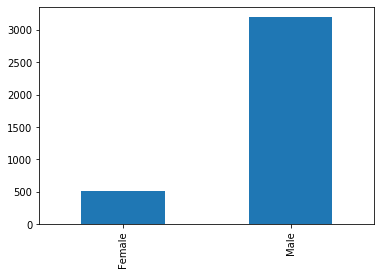

In [183]:
movie_data['Gender'].value_counts().sort_values().plot(kind = 'bar')

In [184]:
movie_data['Film'] = movie_data['title'].str.split(pat = '(', n = 1 ,expand = False ).str[0].str.strip()

In [185]:
# Merge awards with movie_names data
print("\n Movie dataframe Shape Before merge with awards : ",str(movie_data.shape))
movie_data = movie_data.merge(awardsDF, on='Film', how ='left')
print("\n Movie dataframe Shape after merge with awards : ",str(movie_data.shape))


 Movie dataframe Shape Before merge with awards :  (3708, 124)

 Movie dataframe Shape after merge with awards :  (3708, 146)


### Awards nominated by each movie

In [186]:
print('Shape of data :', movie_data.shape)
# Extract the columns starting with awards that represent the awards nominated for
nominated_awards_filter_col = [col for col in movie_data if col.startswith('Award_')]

# Store nominated awards data
nominated_awards_df = movie_data[nominated_awards_filter_col]

# # Drop these from the original dataframe
# movie_data.drop(columns= nominated_awards_filter_col,inplace =True )
# print('Shape of data after dropping the awards nominated features:', movie_data.shape)

# Extract the awards nominated by each movie by summing across the columns
movie_data['awards_nominated'] = nominated_awards_df.sum(axis='columns')
print('Shape of data after extracting the number of awards nominated feature:', movie_data.shape)

Shape of data : (3708, 146)
Shape of data after extracting the number of awards nominated feature: (3708, 147)


In [187]:
movie_data['awards_nominated'].sum()

268.0

### Awards won by each movie

In [188]:
print('Shape of data :', movie_data.shape)
# Extract the columns starting with awards that represent the awards won
winner_awards_filter_col = [col for col in movie_data if col.startswith('Winner_')]

# Store awards won data
winner_awards_df = movie_data[winner_awards_filter_col]

# # Drop these from the original dataframe
# movie_data.drop(columns= winner_awards_filter_col,inplace =True )
# print('Shape of data after dropping the awards won features:', movie_data.shape)

# Extract the awards won by each movie by summing across the columns
movie_data['awards_won'] = winner_awards_df.sum(axis='columns')
print('Shape of data after extracting the number of awards won feature:', movie_data.shape)

Shape of data : (3708, 147)
Shape of data after extracting the number of awards won feature: (3708, 148)


In [189]:
movie_data['awards_won'].sum()

62.0

In [190]:
movie_data = movie_data.fillna(0)
movie_data.to_csv('data2_Movies_WithAwards.csv', index = False, encoding="utf-8-sig")

In [168]:
break

SyntaxError: 'break' outside loop (<ipython-input-168-6aaf1f276005>, line 4)

## Weighted rank

In [18]:
movie_data.rating_count.describe()

count    3.708000e+03
mean     1.032216e+05
std      1.555415e+05
min      2.900000e+01
25%      1.353550e+04
50%      4.647700e+04
75%      1.249320e+05
max      1.718048e+06
Name: rating_count, dtype: float64

In [19]:
# Weighted ranking value
# IMDB uses this famous formula:
# weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

# Where:

# R = average for the movie (mean) = (rating)

# v = number of votes for the movie = (votes)

# m = minimum votes required to be listed in the Top Rated list (currently 25,000)

# C = the mean vote across the whole report

In [20]:
def weightedRank(df,R='rating_value', v='rating_count', m = 0):
#     df = df.loc[df[v] > m ]
    df['weighted_rank'] = (df[v] / (df[v] + m )) * df[R] + (m / ( df[v] + m)) * df[R].mean()
    return df

In [21]:
movie_data = weightedRank(movie_data, m= movie_data.rating_count.quantile(0.5) )

In [22]:
movie_data[['movie_id','rating_value','rating_count','weighted_rank']].head()

,movie_id,rating_value,rating_count,weighted_rank
0,tt0017136,8.3,114917,7.798277
1,tt0027977,8.6,147990,8.111906
2,tt0032138,8.1,299644,7.892906
3,tt0032138,8.1,299644,7.892906
4,tt0035423,6.4,65765,6.465317


In [23]:
movie_data.rating_value.describe()

count    3708.000000
mean        6.557740
std         1.005446
min         1.500000
25%         6.000000
50%         6.700000
75%         7.200000
max         9.200000
Name: rating_value, dtype: float64

In [24]:
movie_data.weighted_rank.describe()

count    3708.000000
mean        6.653003
std         0.561823
min         3.506006
25%         6.390750
50%         6.576599
75%         6.888429
max         9.100160
Name: weighted_rank, dtype: float64

In [25]:
movie_data[movie_data.rating_value>7.2].count().head()

director_ids         910
director_names       910
movie_id             910
title                910
review_count_user    910
dtype: int64

In [26]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)


In [27]:
genre_thriller_male = movie_data[movie_data['Gender'] == 'Male' ]['genre_Thriller']
genre_thriller_male.value_counts()

0    2261
1     938
Name: genre_Thriller, dtype: int64

In [28]:
genre_thriller_female = movie_data[movie_data['Gender'] == 'Female' ]['genre_Thriller']
genre_thriller_female.value_counts()

0    391
1    118
Name: genre_Thriller, dtype: int64

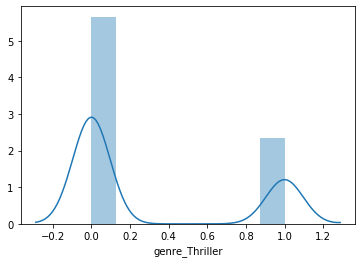

In [29]:
sns.distplot(genre_thriller_male)


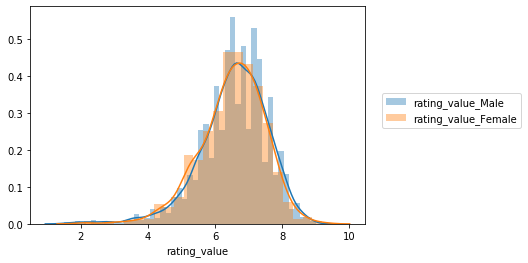

In [30]:
plot_features_WRT_gender(movie_data,"Gender","rating_value")

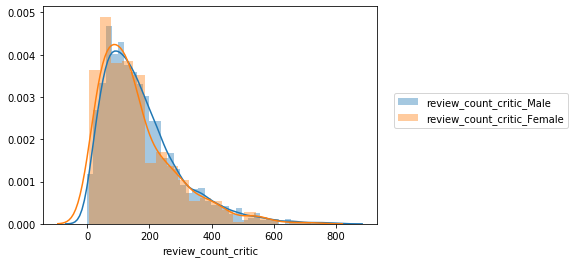

In [31]:
plot_features_WRT_gender(movie_data,"Gender","review_count_critic")

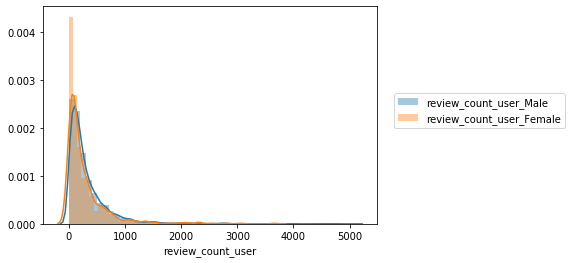

In [32]:
plot_features_WRT_gender(movie_data,"Gender","review_count_user")

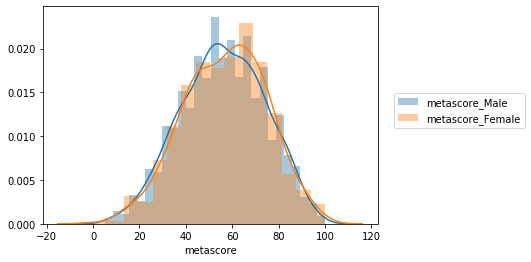

In [33]:
plot_features_WRT_gender(movie_data,"Gender","metascore")

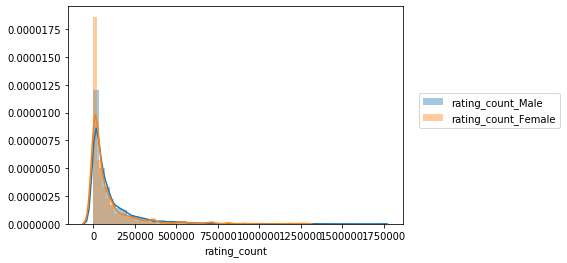

In [34]:
plot_features_WRT_gender(movie_data,"Gender","rating_count")